# ABSTRACT

# OVERVIEW

# BUSINESS PROBLEM

# IMPORTS

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.reset()
# plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier

from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.svm import SVC

from sklearn.preprocessing import OrdinalEncoder

from IPython.display import display, HTML, Markdown

import warnings

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from imports_and_functions.packages import *
import imports_and_functions as fn

# OBTAIN

In [4]:
raw_df = pd.read_csv('./data/BankChurners.csv')

In [5]:
raw_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
raw_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
raw_df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
],
        inplace=True)
raw_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
raw_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [9]:
raw_df['Income_Category'].apply(lambda x: x.replace("$", "")).apply(
    lambda x: x.replace(" - ", "_to_")).apply(
        lambda x: x.replace("120K +", "Above 120K")).apply(lambda x: x.replace(
            "Less than 40K", "Less_than_40K")).value_counts()

Less_than_40K    3561
40K_to_60K       1790
80K_to_120K      1535
60K_to_80K       1402
Unknown          1112
Above 120K        727
Name: Income_Category, dtype: int64

In [10]:
raw_df['Income_Category'] = raw_df['Income_Category'].apply(
    lambda x: x.replace("$", "")).apply(
        lambda x: x.replace(" - ", "_to_")).apply(
            lambda x: x.replace("120K +", "Above_120K")).apply(
                lambda x: x.replace("Less than 40K", "Less_than_40K"))
raw_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K_to_80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less_than_40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K_to_120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less_than_40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K_to_80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,40K_to_60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,40K_to_60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less_than_40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40K_to_60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [11]:
(raw_df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

In [12]:
df = raw_df.copy()
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K_to_80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less_than_40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K_to_120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less_than_40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K_to_80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,40K_to_60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,40K_to_60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less_than_40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40K_to_60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [13]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.33,8.02,26.0,41.00,46.00,52.00,73.00
Dependent_count,10127.0,2.35,1.30,0.0,1.00,2.00,3.00,5.00
Months_on_book,10127.0,35.93,7.99,13.0,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.0,3.81,1.55,1.0,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.0,2.34,1.01,0.0,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.0,2.46,1.11,0.0,2.00,2.00,3.00,6.00
Credit_Limit,10127.0,8631.95,9088.78,1438.3,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.0,1162.81,814.99,0.0,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.0,7469.14,9090.69,3.0,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.0,0.76,0.22,0.0,0.63,0.74,0.86,3.40


# EDA

In [15]:
print(f'Minimum customer age: {df.Customer_Age.unique().min()}')
print(f'Maximum customer age: {df.Customer_Age.unique().max()}')

Minimum customer age: 26
Maximum customer age: 73


# SCRUB

In [16]:
(df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

## Label encoding

In [17]:
churn_map = {'Existing Customer':0, 'Attrited Customer':1}

In [18]:
X = df.drop(columns='Attrition_Flag').copy()
y = df.Attrition_Flag.map(churn_map).copy()

## Train-Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Encoding

### Feature Encoding

In [20]:
# isolating numerical cols
nume_col = list(X.select_dtypes('number').columns)
# isolating categorical cols
cate_col = list(X.select_dtypes('object').columns)
# pipeline for processing categorical features
pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=None))])
# pipeline for processing numerical features
pipe_nume = Pipeline([('scaler', StandardScaler())])
# transformer
preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                  ('cate_feat', pipe_cate, cate_col)])
# creating dataframes
# X_train
X_train_pr = pd.DataFrame(preprocessor.fit_transform(X_train),
                          columns=nume_col +
                          list(preprocessor.named_transformers_['cate_feat'].
                               named_steps['ohe'].get_feature_names(cate_col)))
# X_test
X_test_pr = pd.DataFrame(preprocessor.fit_transform(X_test),
                         columns=nume_col +
                         list(preprocessor.named_transformers_['cate_feat'].
                              named_steps['ohe'].get_feature_names(cate_col)))

## SMOTENC

In [21]:
X_train_pr

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_40K_to_60K,Income_Category_60K_to_80K,Income_Category_80K_to_120K,Income_Category_Above_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,2.331223,-1.804207,2.135097,0.123374,-1.324002,0.492703,-0.677120,1.270174,-0.791544,0.360899,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.284685,1.264906,-0.364205,0.123374,-1.324002,1.394304,0.661203,1.105060,0.561091,-1.066436,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.526892,-1.804207,-1.988751,-1.158795,-0.332897,-0.408898,-0.666289,1.481765,-0.799830,1.235424,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.160118,1.264906,0.635516,0.764458,-1.324002,-0.408898,-0.731387,0.208552,-0.749896,-0.423003,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.654923,-0.269651,-1.863786,0.764458,0.658208,0.492703,1.353518,-1.426690,1.481776,-0.074099,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,-1.654923,-1.036929,0.010690,-0.517711,-0.332897,1.394304,-0.220329,0.334528,-0.250446,-0.595189,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8097,0.462717,-1.036929,0.010690,0.123374,-0.332897,-0.408898,0.369532,1.129521,0.267343,-0.273472,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8098,2.331223,-1.036929,2.135097,1.405543,-0.332897,0.492703,0.246520,0.758932,0.177859,-0.509096,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8099,1.459254,-1.036929,1.260341,0.123374,-1.324002,0.492703,-0.635011,0.447050,-0.675105,-0.803625,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [22]:
X_train_pr.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_40K_to_60K', 'Income_Category_60K_to_80K',
       'Income_Category_80K_to_120K', 'Income_Category_Above_120K',
       'Income_Category_Less_than_40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card

In [23]:
smotenc_features = [False] * len(nume_col) + [True] * (
    len(X_train_pr.columns) - len(nume_col))
# smotenc_features

In [24]:
oversampling = SMOTENC(categorical_features=smotenc_features, n_jobs=-1)

In [25]:
X_train_pr_os, y_train_encoded_os = oversampling.fit_sample(X_train_pr, y_train)

# MODEL

## Segmentation

In [26]:
# # lable Encoding
# Education_Level_map = {
#     'High School': 2,
#     'Graduate': 4,
#     'Uneducated': 0,
#     'Unknown': 1,
#     'College': 3,
#     'Post-Graduate': 5,
#     'Doctorate': 6
# }
# Income_Category_map = {
#     '60K_to_80K': 3,
#     'Less_than_40K': 1,
#     '80K_to_120K': 4,
#     '40K_to_60K': 3,
#     'Above_120K': 5,
#     'Unknown': 0
# }
# Card_Category_map = {'Blue': 0, 'Gold': 2, 'Silver': 1, 'Platinum': 3}

# # OHE
# Marital_Status_map = {'Married': 2, 'Single': 1, 'Unknown': 0, 'Divorced': 3}
# Gender_map = {'M': 1, 'F': 0}

# X.Education_Level = X.Education_Level.map(Education_Level_map)
# X.Income_Category = X.Income_Category.map(Income_Category_map)
# X.Card_Category = X.Card_Category.map(Card_Category_map)

# X.Marital_Status = X.Marital_Status.map(Marital_Status_map)
# X.Gender = X.Gender.map(Gender_map)
# display("X",X)

# seg_scaler = StandardScaler()
# seg_scaler.fit(X)
# X_segmentation = pd.DataFrame(seg_scaler.transform(X),columns=X.columns)
# display("X_segmentation", X_segmentation)

In [27]:
X_segmentation = fn.dataset_processor_segmentation(X, verbose=2)

Numerical columns: 
---------------------
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns: 
---------------------
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


------
Scaler: StandardScaler, settings: {'copy': True, 'with_mean': True, 'with_std': True}
Encoder: OneHotEncoder, settings: {'categories': 'auto', 'drop': None, 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'sparse': False}
------


### Finding "K"

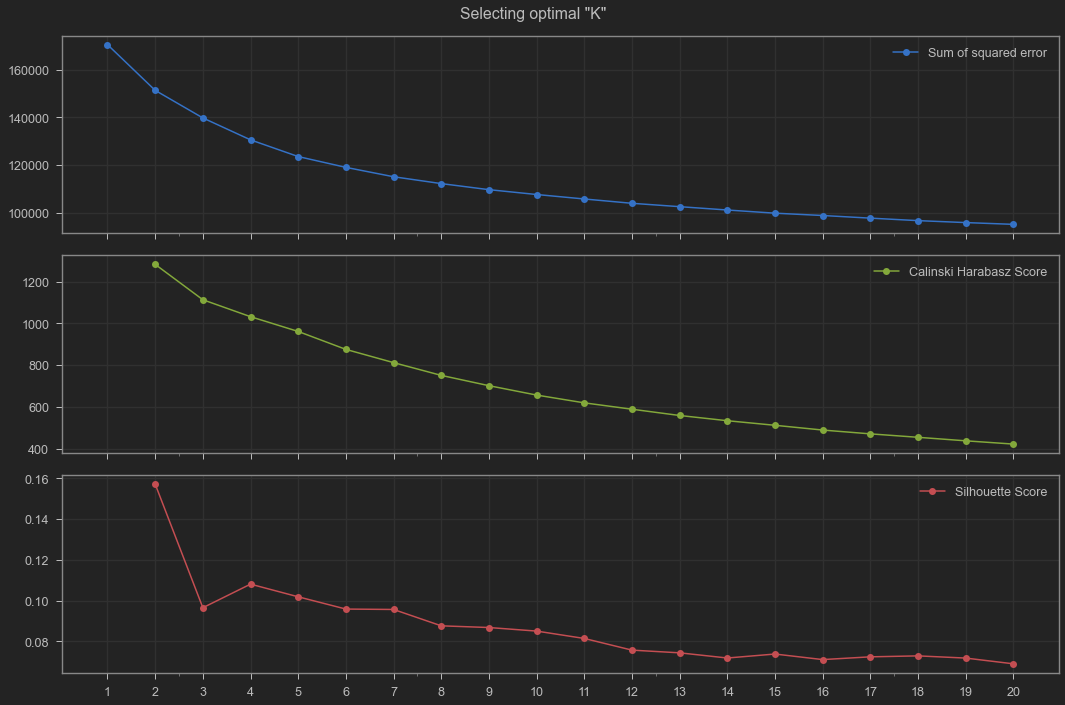

In [28]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = metrics.calinski_harabasz_score(X_segmentation, cluster)
        ss = metrics.silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

### Selecting "K"

In [29]:
kmeans = KMeans(init='k-means++',
                algorithm='auto',
                n_clusters=5,
                max_iter=1000,
                random_state=1,
                verbose=0).fit(X_segmentation)

In [30]:
clusters = kmeans.predict(X_segmentation)
cluster_df = X_segmentation.copy()
cluster_df['Clusters'] = clusters
cluster_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_60K_to_80K,Income_Category_80K_to_120K,Income_Category_Above_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Clusters
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [31]:
(cluster_df.Clusters.value_counts(1)*100).round(2)

2    30.23
1    26.83
3    19.75
4    13.55
0     9.65
Name: Clusters, dtype: float64

In [32]:
@interact(x=cluster_df.columns,y=cluster_df.columns,z=cluster_df.columns)
def plot_segments(x='Customer_Age', y='Months_on_book', z='Credit_Limit'):
    fig = px.scatter_3d(cluster_df, x=x, y=y, z=z, color='Clusters', template='plotly_dark')
    fig.show()

interactive(children=(Dropdown(description='x', options=('Customer_Age', 'Dependent_count', 'Months_on_book', …

### Feature importance

In [33]:
X_feat_imp = cluster_df.drop(columns='Clusters').copy()
y_feat_imp = cluster_df.Clusters.copy()

In [34]:
X_feat_imp_train, X_feat_imp_test, y_feat_imp_train, y_feat_imp_test = train_test_split(X_feat_imp, y_feat_imp, train_size=.8)

In [36]:
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report_multiclass(clf_rf,
                           X_feat_imp_train,
                           y_feat_imp_train,
                           X_feat_imp_test,
                           y_feat_imp_test,
                           show_train_report=False)

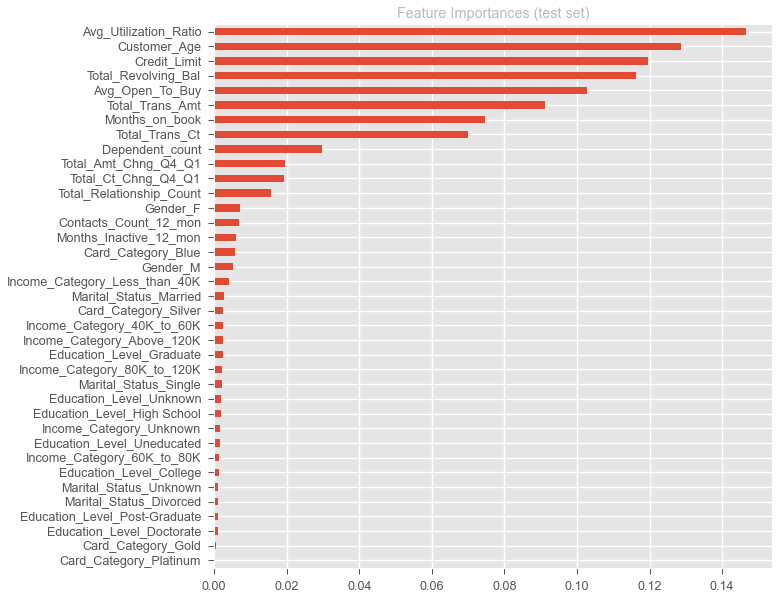

In [53]:
# Random Forest
with plt.style.context('ggplot'):
    pd.Series(clf_rf.feature_importances_,
          index=X_feat_imp_test.columns).sort_values().plot(kind='barh',
                                                          figsize=(10, 10))
    plt.title('Feature Importances (test set)')

In [ ]:
# permutation importance

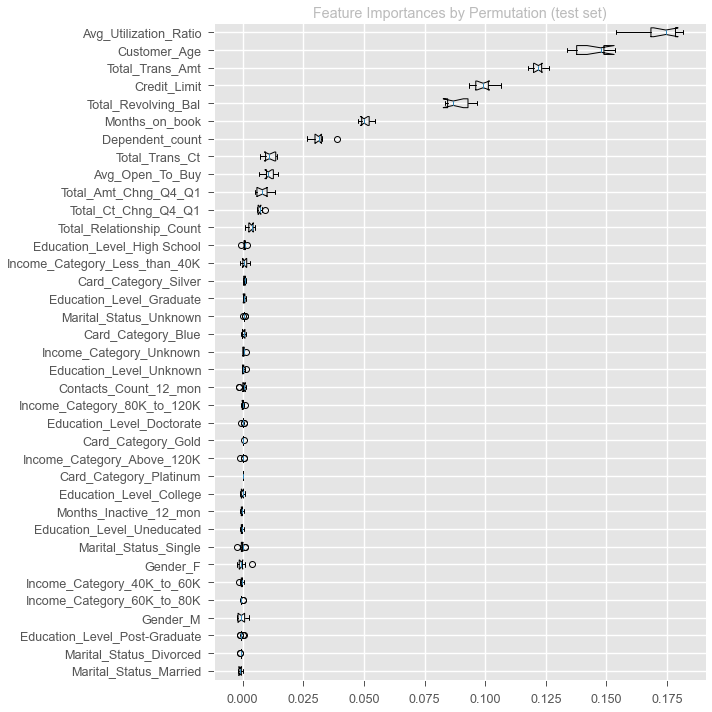

In [55]:
result = permutation_importance(clf_rf, X_feat_imp_test, y_feat_imp_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.boxplot(result.importances[sorted_idx].T,notch=True,
               vert=False, labels=X_feat_imp_test.columns[sorted_idx])
    ax.set_title("Feature Importances by Permutation (test set)")
    fig.tight_layout()
    plt.show()

## Prediction

In [103]:
cluster_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_60K_to_80K,Income_Category_80K_to_120K,Income_Category_Above_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Clusters
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


### Baseline model

In [57]:
base_model = DummyClassifier(strategy='stratified')

******************************************************************************************
Train accuracy score: 0.4994
Test accuracy score: 0.4916
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      6776
           1       0.50      0.50      0.50      6776

    accuracy                           0.50     13552
   macro avg       0.50      0.50      0.50     13552
weighted avg       0.50      0.50      0.50     13552

************************************************************


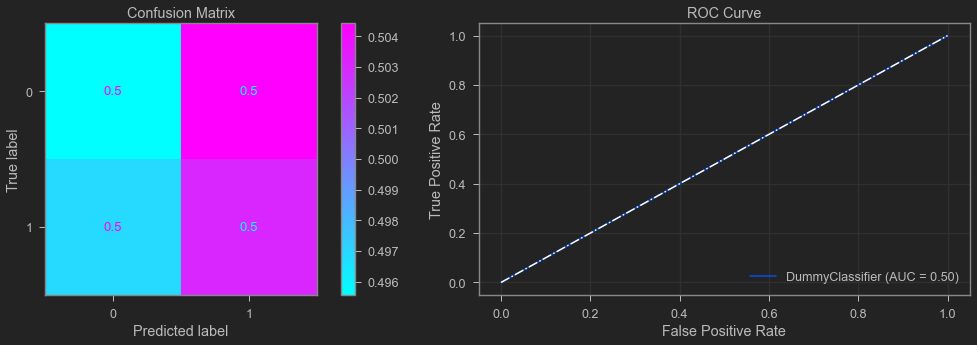

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.84      0.50      0.62      1724
           1       0.14      0.47      0.22       302

    accuracy                           0.49      2026
   macro avg       0.49      0.48      0.42      2026
weighted avg       0.74      0.49      0.56      2026

************************************************************


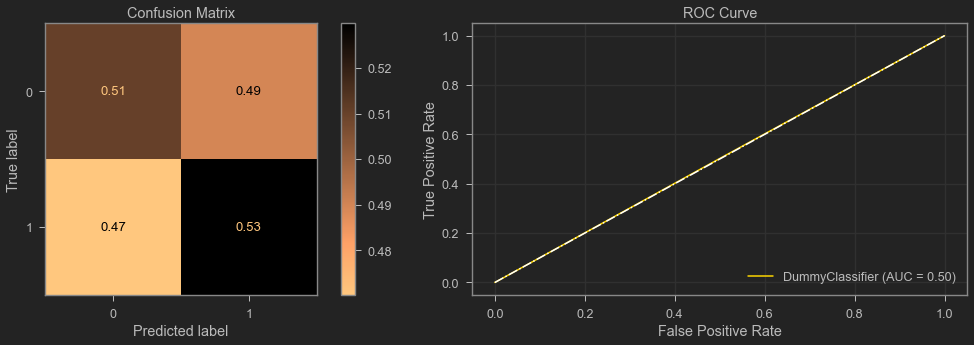

In [58]:
fn.model_report(base_model, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test)

### Logistic Regression

### Random Forest

#### OG data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9585
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1724
           1       0.89      0.82      0.85       302

    accuracy                           0.96      2026
   macro avg       0.93      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************


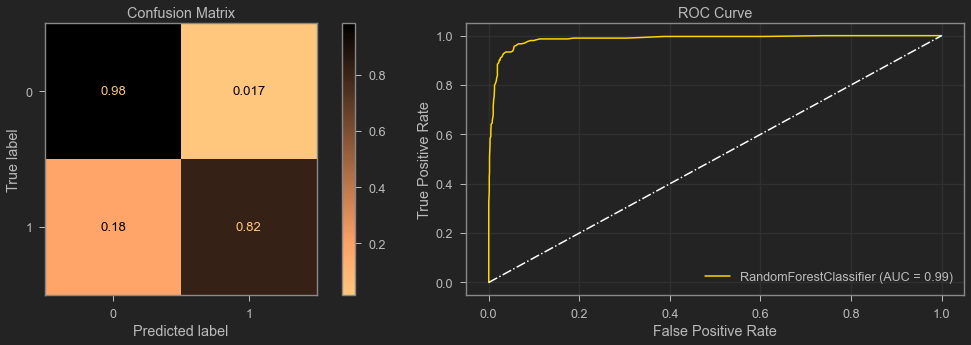

In [60]:
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report(clf_rf,
             X_train_pr,
             y_train,
             X_test_pr,
             y_test,
             show_train_report=False)

#### OS data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9388
    Possible Overfitting, diffrence of scores 6.12% crossed 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1724
           1       0.74      0.91      0.82       302

    accuracy                           0.94      2026
   macro avg       0.86      0.93      0.89      2026
weighted avg       0.95      0.94      0.94      2026

************************************************************


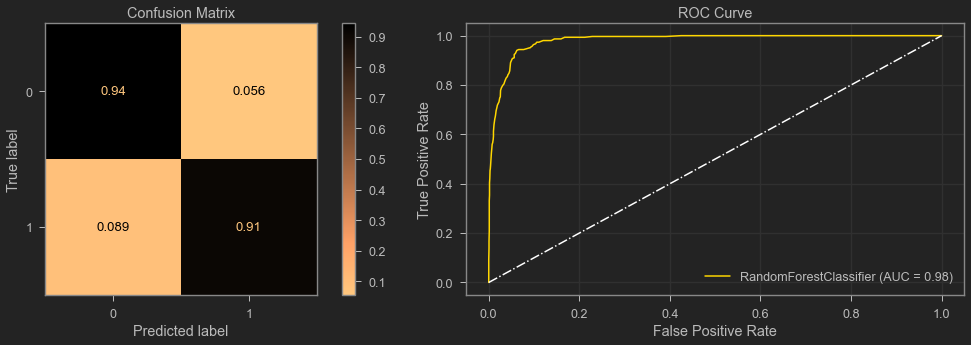

In [62]:
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report(clf_rf,
             X_train_pr_os,
             y_train_encoded_os,
             X_test_pr,
             y_test,
             show_train_report=False)

#### Grid Search

In [100]:
rf_clf_gs = RandomForestClassifier(n_jobs=-1, verbose=0)
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5,6,7],
    'min_samples_leaf': [ 2, 3, 4],
#     'class_weight': ["balanced", "balanced_subsample"]
}
gridsearch_rf_clf = GridSearchCV(estimator=rf_clf_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='f1_macro')
gridsearch_rf_clf

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'min_samples_leaf': [2, 3, 4]},
             scoring='f1_macro')

In [101]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_rf_clf.fit(X_train_pr_os, y_train_encoded_os)
print(f"Best Parameters by gridsearch:\t{gridsearch_rf_clf.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_rf_clf.best_estimator_}")

rf_clf_gs_best = gridsearch_rf_clf.best_estimator_

Best Parameters by gridsearch:	{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2}
Best Estimator by gridsearch:	RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_jobs=-1)


In [99]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

******************************************************************************************
Train accuracy score: 0.9452
Test accuracy score: 0.9033
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1724
           1       0.62      0.92      0.74       302

    accuracy                           0.90      2026
   macro avg       0.80      0.91      0.84      2026
weighted avg       0.93      0.90      0.91      2026

************************************************************


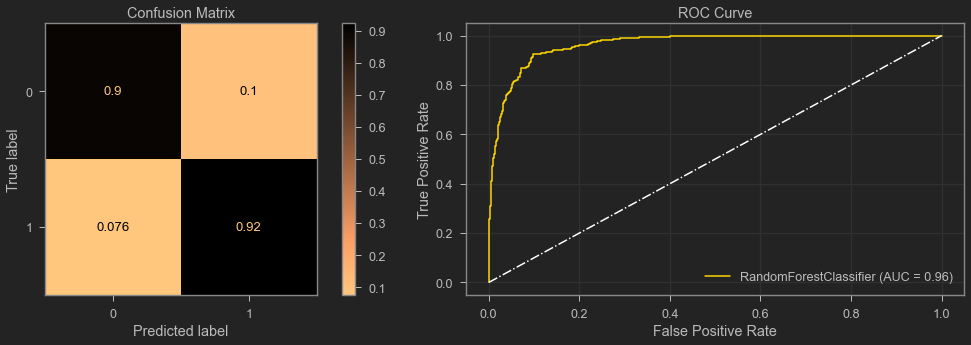

In [96]:
fn.model_report(rf_clf_gs_best, X_train_pr_os, y_train_encoded_os, X_test_pr,
             y_test,
             show_train_report=False)

### XGBoost

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9097
    Possible Overfitting, diffrence of scores 9.03% crossed 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1724
           1       0.63      0.97      0.76       302

    accuracy                           0.91      2026
   macro avg       0.81      0.93      0.85      2026
weighted avg       0.94      0.91      0.92      2026

************************************************************


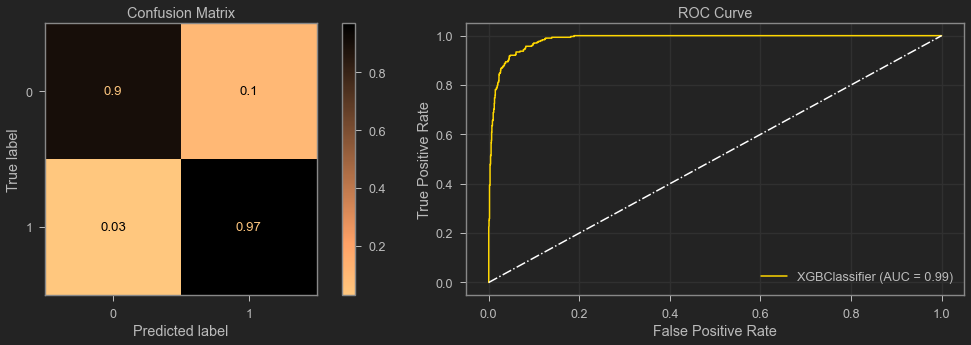

In [78]:
clf_xg = XGBClassifier(n_jobs=-1)
fn.model_report(clf_xg, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

******************************************************************************************
Train accuracy score: 0.952
Test accuracy score: 0.9047
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1724
           1       0.62      0.92      0.74       302

    accuracy                           0.90      2026
   macro avg       0.80      0.91      0.84      2026
weighted avg       0.93      0.90      0.91      2026

************************************************************


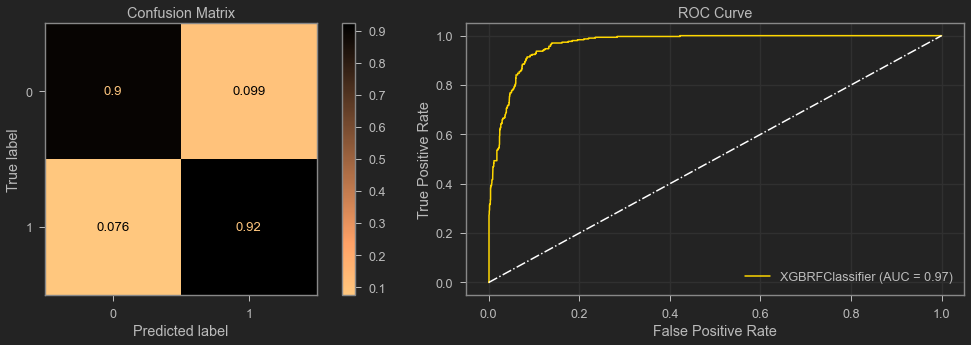

In [79]:
clf_xg = XGBRFClassifier(n_jobs=-1)
fn.model_report(clf_xg, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

### SVC

In [69]:
clf_svc = SVC(kernel='linear', C=100, class_weight='balanced')
# clf_svc = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', tol=.8)
# clf_svc = SVC(kernel='poly', degree=2, C=1, gamma='scale', class_weight='balanced')
# clf_svc = SVC(kernel='sigmoid', C=2, class_weight='balanced')

******************************************************************************************
Train accuracy score: 0.9251
Test accuracy score: 0.8998
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1695
           1       0.70      0.67      0.69       331

    accuracy                           0.90      2026
   macro avg       0.82      0.81      0.81      2026
weighted avg       0.90      0.90      0.90      2026

************************************************************


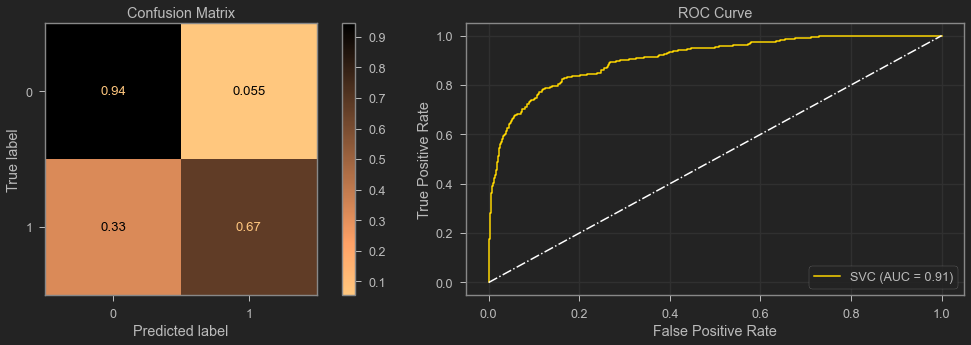

In [70]:
model_report(clf_svc, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

# INTERPRET 

# RECOMMENDATION

# CONCLUSION

# NEXT STEPS

# APPENDIX